In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2 as cv

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import colors
from skimage.color import rgb2gray, rgb2hsv, hsv2rgb
from skimage.io import imread, imshow
from sklearn.cluster import KMeans

In [78]:
print("DONE IMPORTING")

DONE IMPORTING


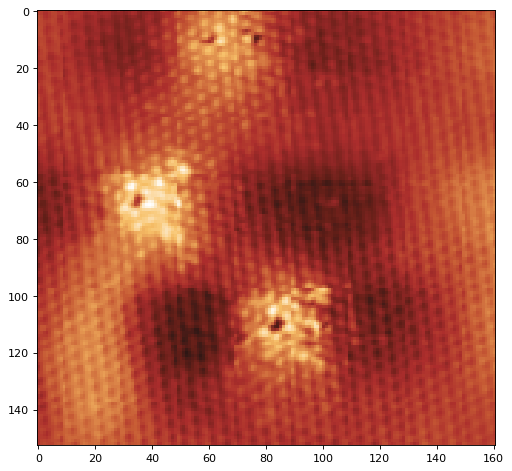

In [79]:
img = imread('image2.PNG')
plt.figure(num=None, figsize=(8, 6), dpi=80)
imshow(img);

In [80]:
def grayScale(img):
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    return gray

def image_to_pandasRGB(image):
    df = pd.DataFrame([image[:,:,0].flatten(),
                       image[:,:,1].flatten(),
                       image[:,:,2].flatten()]).T
    df.columns = ["Red","Green","Blue"]
    return df

def image_to_pandas(image):
    df = pd.DataFrame([image[:,:].flatten()]).T
    df.columns = ["GrayScaleVals"]
    return df

In [81]:

# df_img = image_to_pandasRGB(img)
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
df_img = image_to_pandas(img)
img 
df_img.head(5)

,GrayScaleVals
0,73
1,70
2,64
3,64
4,70


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


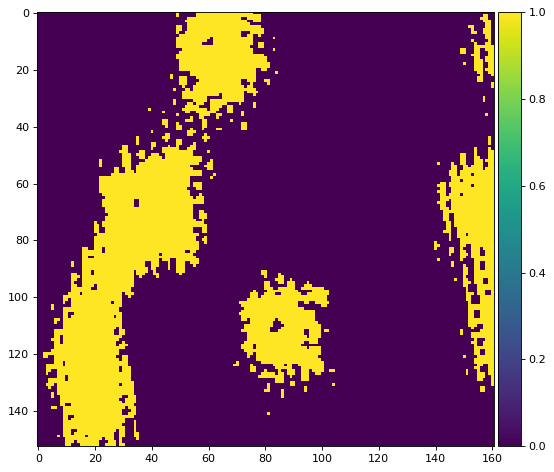

In [82]:
plt.figure(num=None, figsize=(8, 6), dpi=80)
kmeans = KMeans(n_clusters=2, random_state = 10).fit(df_img)
result = kmeans.labels_.reshape(img.shape[0],img.shape[1])
imshow(result, cmap='viridis')
plt.show()